# <center> <font color=#B40404>Supervised Learning Project</center>
    
## <center> <font color=#B40404>Submitted by Utathya Ghosh</center>
    
### <center> <font color=#B40404>Batch - AIML Online Jan 21-A</center>

# <center>PART ONE</center>
# <center>PROJECT BASED</center>
# <center>TOTAL SCORE - 30</center>

DOMAIN: Healthcare

CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. 
University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by 
the client by providing different datasets to the AI team for developing a AIML model which can predict the 
condition of the patient depending on the received test results. 

DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current 
conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and 
orientation of the condition to their body part.

1. P_incidence
2. P_tilt
3. L_angle 
4. S_slope
5. P_radius 
6. S_degree
7. Class

PROJECT OBJECTIVE: Demonstrate the ability to fetch, process and leverage data to generate useful predictions 
by training Supervised Learning algorithms.
Steps and tasks: [ Total score: 30 points ]

In [55]:
# Loading the required libraries in one place
import pandas as pd
import numpy as np
import os
import time
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline
from scipy.stats import ttest_ind, levene, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#### 1. Import and warehouse data:
##### • Import all the given datasets and explore shape and size of each.

In [56]:
# Reading the csv file into dataframe

# Error handling for missing Normal dataset csv
# Running a loop till correct file has been found
while(True):
    try:
        # Reading the desired dataset into desired df_ tagged variable
        df_normal = pd.read_csv("Part1 - Normal.csv")
        # Leaving loop if file found
        break
    except OSError as e:

        # Provide instructions if file not found
        file_path = os.path.join(os.path.abspath(''))
        print("Please place the file named <Part1 - Normal.csv> at the path", file_path)
        # Waiting for user input to check again, Actual verification of what user has inputted is inconsequential
        input("System waits: Have you placed the correct files in path? (Input 'Y' for Yes)")
        
# Error handling for missing Type_H dataset csv
# Running a loop till correct file has been found
while(True):
    try:
        # Reading the desired dataset into desired df_ tagged variable
        df_H = pd.read_csv("Part1 - Type_H.csv")
        # Leaving loop if file found
        break
    except OSError as e:

        # Provide instructions if file not found
        file_path = os.path.join(os.path.abspath(''))
        print("Please place the file named <Part1 - Type_H.csv> at the path", file_path)
        # Waiting for user input to check again, Actual verification of what user has inputted is inconsequential
        input("System waits: Have you placed the correct files in path? (Input 'Y' for Yes)")
        
# Error handling for missing Type_S dataset csv
# Running a loop till correct file has been found
while(True):
    try:
        # Reading the desired dataset into desired df_ tagged variable
        df_S = pd.read_csv("Part1 - Type_S.csv")
        # Leaving loop if file found
        break
    except OSError as e:

        # Provide instructions if file not found
        file_path = os.path.join(os.path.abspath(''))
        print("Please place the file named <Part1 - Type_S.csv> at the path", file_path)
        # Waiting for user input to check again, Actual verification of what user has inputted is inconsequential
        input("System waits: Have you placed the correct files in path? (Input 'Y' for Yes)")

In [57]:
# Displaying the shape and size of all dataframes created

# Adding a wait time of 10 seconds for vars dictionary to be updated


for t in range(5,30,5):
# Running a loop through all variables
    try:
        for name in vars().keys():
            # Entry into loop allowed only for dataframes created based on our naming conventions
            if name[:3] == "df_":
                # Printing Required informations
                print(name, ":-")
                print("Shape : ", eval(name).shape)
                print("Size : ", eval(name).size)
                # Extra print added for cosmetic reasons
                print()
        break
    except RuntimeError as e:
        time.sleep(t)
        continue

df_normal :-
Shape :  (100, 7)
Size :  700

df_H :-
Shape :  (60, 7)
Size :  420

df_S :-
Shape :  (150, 7)
Size :  1050

df_master :-
Shape :  (310, 10)
Size :  3100

df_abnormal :-
Shape :  (210, 10)
Size :  2100

df_cm :-
Shape :  (3, 3)
Size :  9



##### • Merge all datasets onto one and explore final shape and size

In [58]:
# Merging all datsets into one master dataset
df_master = pd.concat([df_normal, df_H, df_S], ignore_index=True)

# Displaying master dataset shape and size
print("Shape of Combined dataset: ", df_master.shape)
print("Size of Combined dataset: ", df_master.size)

Shape of Combined dataset:  (310, 7)
Size of Combined dataset:  2170


#### 2. Data cleansing:
##### • Explore and if required correct the datatypes of each attribute

In [59]:
# Displaying common stats of all columns
df_master.describe(include="all")

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,Type_S
freq,NaN,NaN,NaN,NaN,NaN,NaN,133
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


###### <font color=#B40404>The stats of object datatype Class suggests there are 6 unique values however SME suggests there can only be 3, Normal, Type_H & Type_S
###### <font color=#B40404>Let us investigate Column class further

In [60]:
# Displaying all unique labels in Class
np.unique(df_master["Class"])

array(['Normal', 'Nrmal', 'Type_H', 'Type_S', 'tp_s', 'type_h'],
      dtype=object)

###### <font color=#B40404>Further analysis verified our suspicions of erroneous labeling. We will proceed by Converting Nrmal to Normal, tp_s to Type_S and type_h t Type_H

In [61]:
# Converting Nrmal to Normal, tp_s to Type_S and type_h t Type_H
df_master.loc[df_master["Class"] == "Nrmal", "Class"] = 'Normal'
df_master.loc[df_master["Class"] == "type_h", "Class"] = 'Type_H'
df_master.loc[df_master["Class"] == "tp_s", "Class"] = 'Type_S'

# Displaying all unique labels in Class again
np.unique(df_master["Class"])

array(['Normal', 'Type_H', 'Type_S'], dtype=object)

###### <font color=#B40404>We will add some new features to the dataset to create more information

In [62]:
# Creating a variable to store the value of pi
pi = 22/7

# Creating new features
df_master["P_radius_circle"] = df_master["P_radius"]**2*pi
df_master["P_radius_sphere"] = df_master["P_radius"]**3*pi
df_master["S_slope_degree"] = np.cos(df_master["S_Degree"])*df_master["S_slope"]

# Moving the target variable to the end of the table
df_master["Class"] = df_master.pop("Class")

##### • Explore for null values in the attributes and if required drop or impute values.

In [63]:
# Checking attribute information to verify if there are any Null values
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   P_incidence      310 non-null    float64
 1   P_tilt           310 non-null    float64
 2   L_angle          310 non-null    float64
 3   S_slope          310 non-null    float64
 4   P_radius         310 non-null    float64
 5   S_Degree         310 non-null    float64
 6   P_radius_circle  310 non-null    float64
 7   P_radius_sphere  310 non-null    float64
 8   S_slope_degree   310 non-null    float64
 9   Class            310 non-null    object 
dtypes: float64(9), object(1)
memory usage: 24.3+ KB


###### <font color=#B40404>We can see from above that there are no null values in the dataset

#### 3. Data analysis & visualisation:
##### • Perform detailed statistical analysis on the data. 

###### <font color=#B40404>First let us look at correlation between all independent variables

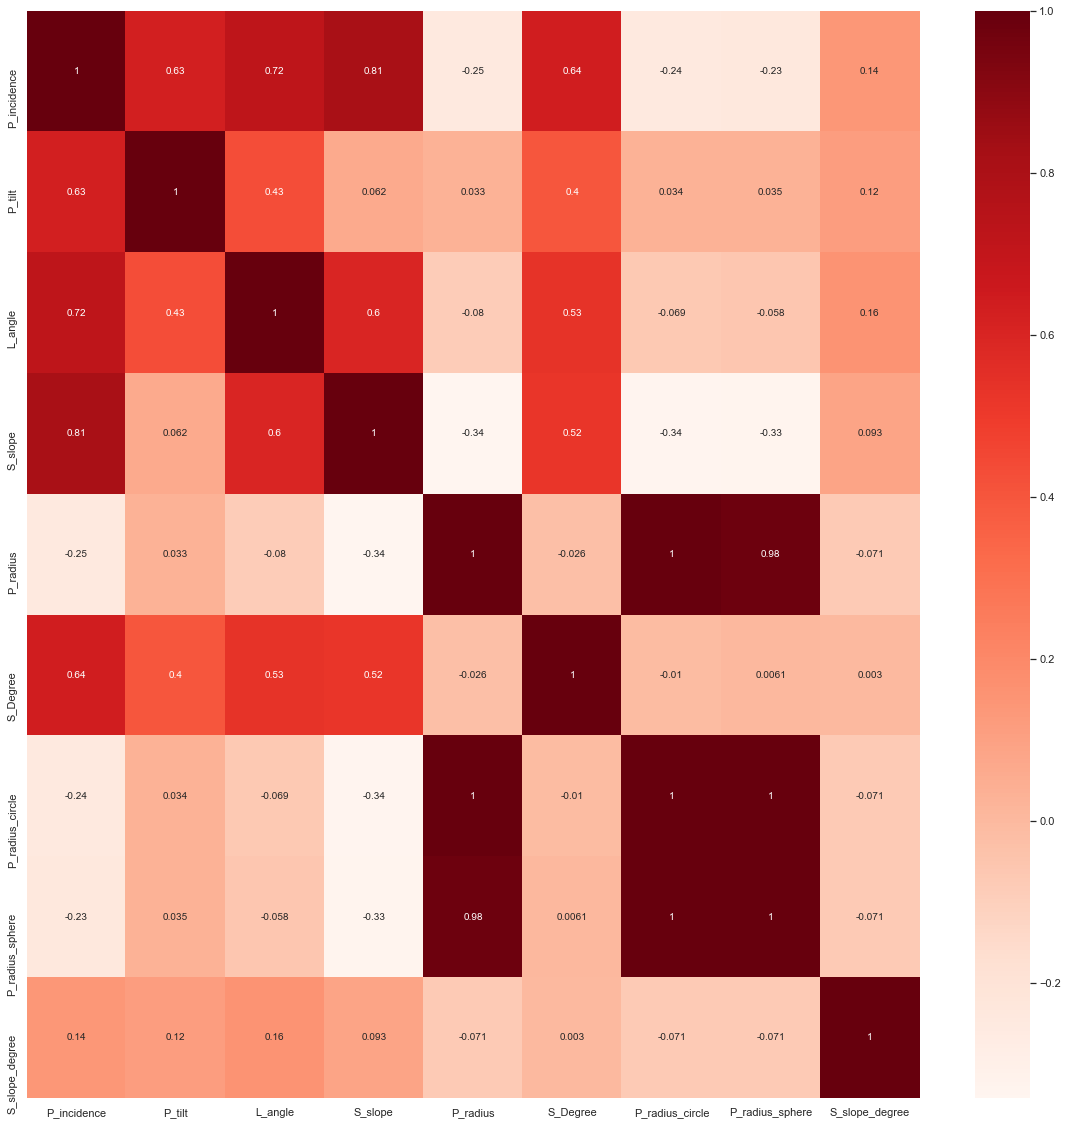

In [64]:
# Displaying the correlation map
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_master.corr(), annot=True, cmap='Reds', ax=ax)
plt.show()

In [65]:
# Displaying all correlations with ascending sort.
df_master.corr().unstack().sort_values().drop_duplicates()

P_radius         S_slope           -0.342128
S_slope          P_radius_circle   -0.336758
                 P_radius_sphere   -0.327304
P_incidence      P_radius          -0.247467
                 P_radius_circle   -0.242553
                 P_radius_sphere   -0.234647
L_angle          P_radius          -0.080344
S_slope_degree   P_radius_circle   -0.071328
                 P_radius          -0.071316
                 P_radius_sphere   -0.071158
P_radius_circle  L_angle           -0.069183
L_angle          P_radius_sphere   -0.057550
S_Degree         P_radius          -0.026065
P_radius_circle  S_Degree          -0.010290
S_slope_degree   S_Degree           0.003038
S_Degree         P_radius_sphere    0.006111
P_tilt           P_radius           0.032668
P_radius_circle  P_tilt             0.033929
P_radius_sphere  P_tilt             0.034864
P_tilt           S_slope            0.062345
S_slope          S_slope_degree     0.092505
P_tilt           S_slope_degree     0.118661
S_slope_de

###### <font color=#B40404>Any values greater and 0.5 or less than -0.5 is a highly correlated pair. Some examples are all P_incidence to any other attribute pair, except for P_radius. P_radius is not correlated to any other attribute except itself. S_Degree is correlated with all attributes other than P_Radius and P_tilt. Other than the above mentioned pairs L_angle is highly correlated to S_slope. As expected P_radius_sphere and P_radius_circle are highly coorelated to each other and P_radius. But new feature S_slope_degree does not have much coorelation which gives us hope that it has created new information.

###### <font color=#B40404>Now to Perform some significance tests between attributes and the target variable. First let us check which attributes can significantly classify between Normal and others (Abnormal). For this we will use the independent two pair t-test

###### <font color=#B40404>Before jumping into the test let us set our Null Hypothesis and Alternate Hypothesis.
    
###### <font color=#B40404>Ho is μ(Normal) = μ(Type_H and Type_S)
###### <font color=#B40404>Ha is μ(Normal) ≠ μ(Type_H and Type_S)

In [66]:
# Creating a function which will return required outputs after performing welch_ttest
def welch_ttest(x, y):
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    # Welch's Test
    t, p = ttest_ind(x, y, equal_var = False)
    
    # Displaying the results found
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

In [67]:
# Performing Welch's t test on normal and abnormal groups for all independent variables
# Running a for loop to extract each attribute name individually
for col in df_master.columns[:-1]:
    # Creating a 2 groups based on Dependent variable labels Normal and Abnormal (Type_H and Type_S)
    group1 = df_master[col][df_master["Class"]=="Normal"]
    group2 = df_master[col][df_master["Class"]!="Normal"]
    
    # Printing newline for cosmetic purposes
    print("\n", col)
    
    # If Shapiro test clears both groups (Confidence of 95%) then perform welch test else display appropriate message
    if (shapiro(group1)[1]<0.05) and (shapiro(group2)[1]<0.05):
        welch_ttest(group1, group2)
    else:
        print("\n At least one of the classes (Normal and Abnormal) is not normally distributed")


 P_incidence

 Welch's t-test= -7.4908 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom= 265.8710

 P_tilt

 At least one of the classes (Normal and Abnormal) is not normally distributed

 L_angle

 Welch's t-test= -6.7450 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom= 285.2325

 S_slope

 At least one of the classes (Normal and Abnormal) is not normally distributed

 P_radius

 At least one of the classes (Normal and Abnormal) is not normally distributed

 S_Degree

 Welch's t-test= -12.3653 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom= 229.3853

 P_radius_circle

 At least one of the classes (Normal and Abnormal) is not normally distributed

 P_radius_sphere

 At least one of the classes (Normal and Abnormal) is not normally distributed

 S_slope_degree

 At least one of the classes (Normal and Abnormal) is not normally distributed


###### <font color=#B40404>We can see for P_incidence, L_angle and S_Degree we should reject our Null Hypothesis and hence we can safely assume that the means of the values of these attibutes, when seperated based on the labels Normal and others (Type_H and Type_S) of the dependent variables class, are different.
    
###### <font color=#B40404>Thus these attributes will do a good job of classifying whether a Class is Normal or others.

###### <font color=#B40404>Now let us apply Tukeys hsd test to compare the means between all labels of Class. Normal vs Type_H vs Type_S
    
###### <font color=#B40404>Ho is μ(group1) = μ(group2)
###### <font color=#B40404>Ha is μ(group1) ≠ μ(group2)
    
###### <font color=#B40404>Confidence of 95% or alpha as 0.05

In [68]:
# Performing Tukey's hsd test on different groups, based on Class variable, for all independent variables
# Running a for loop to extract each attribute name individually
for col in df_master.columns[:-1]:
    # Printing newline for cosmetic purposes
    print("\n", col, "\n")
    # Display Tuhey hsd test results
    print(pairwise_tukeyhsd(df_master[col], df_master["Class"], alpha=0.05))


 P_incidence 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Normal Type_H  -4.0468 0.1597 -9.2373  1.1436  False
Normal Type_S   19.829  0.001 15.7256 23.9324   True
Type_H Type_S  23.8758  0.001 19.0206  28.731   True
----------------------------------------------------

 P_tilt 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Normal Type_H   4.5774 0.0087  0.9585  8.1963   True
Normal Type_S   7.9266  0.001  5.0656 10.7876   True
Type_H Type_S   3.3492 0.0532 -0.0359  6.7344  False
----------------------------------------------------

 L_angle 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Normal Type_H  -8.0791 0.0015 -13.4925 -2.6657   True
Nor

##### • Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

###### <font color=#B40404>Let's look at a pairplot first as it covers a multivariate analysis where the diagonal is an univariate analysis and the rest is bivariate analysis.

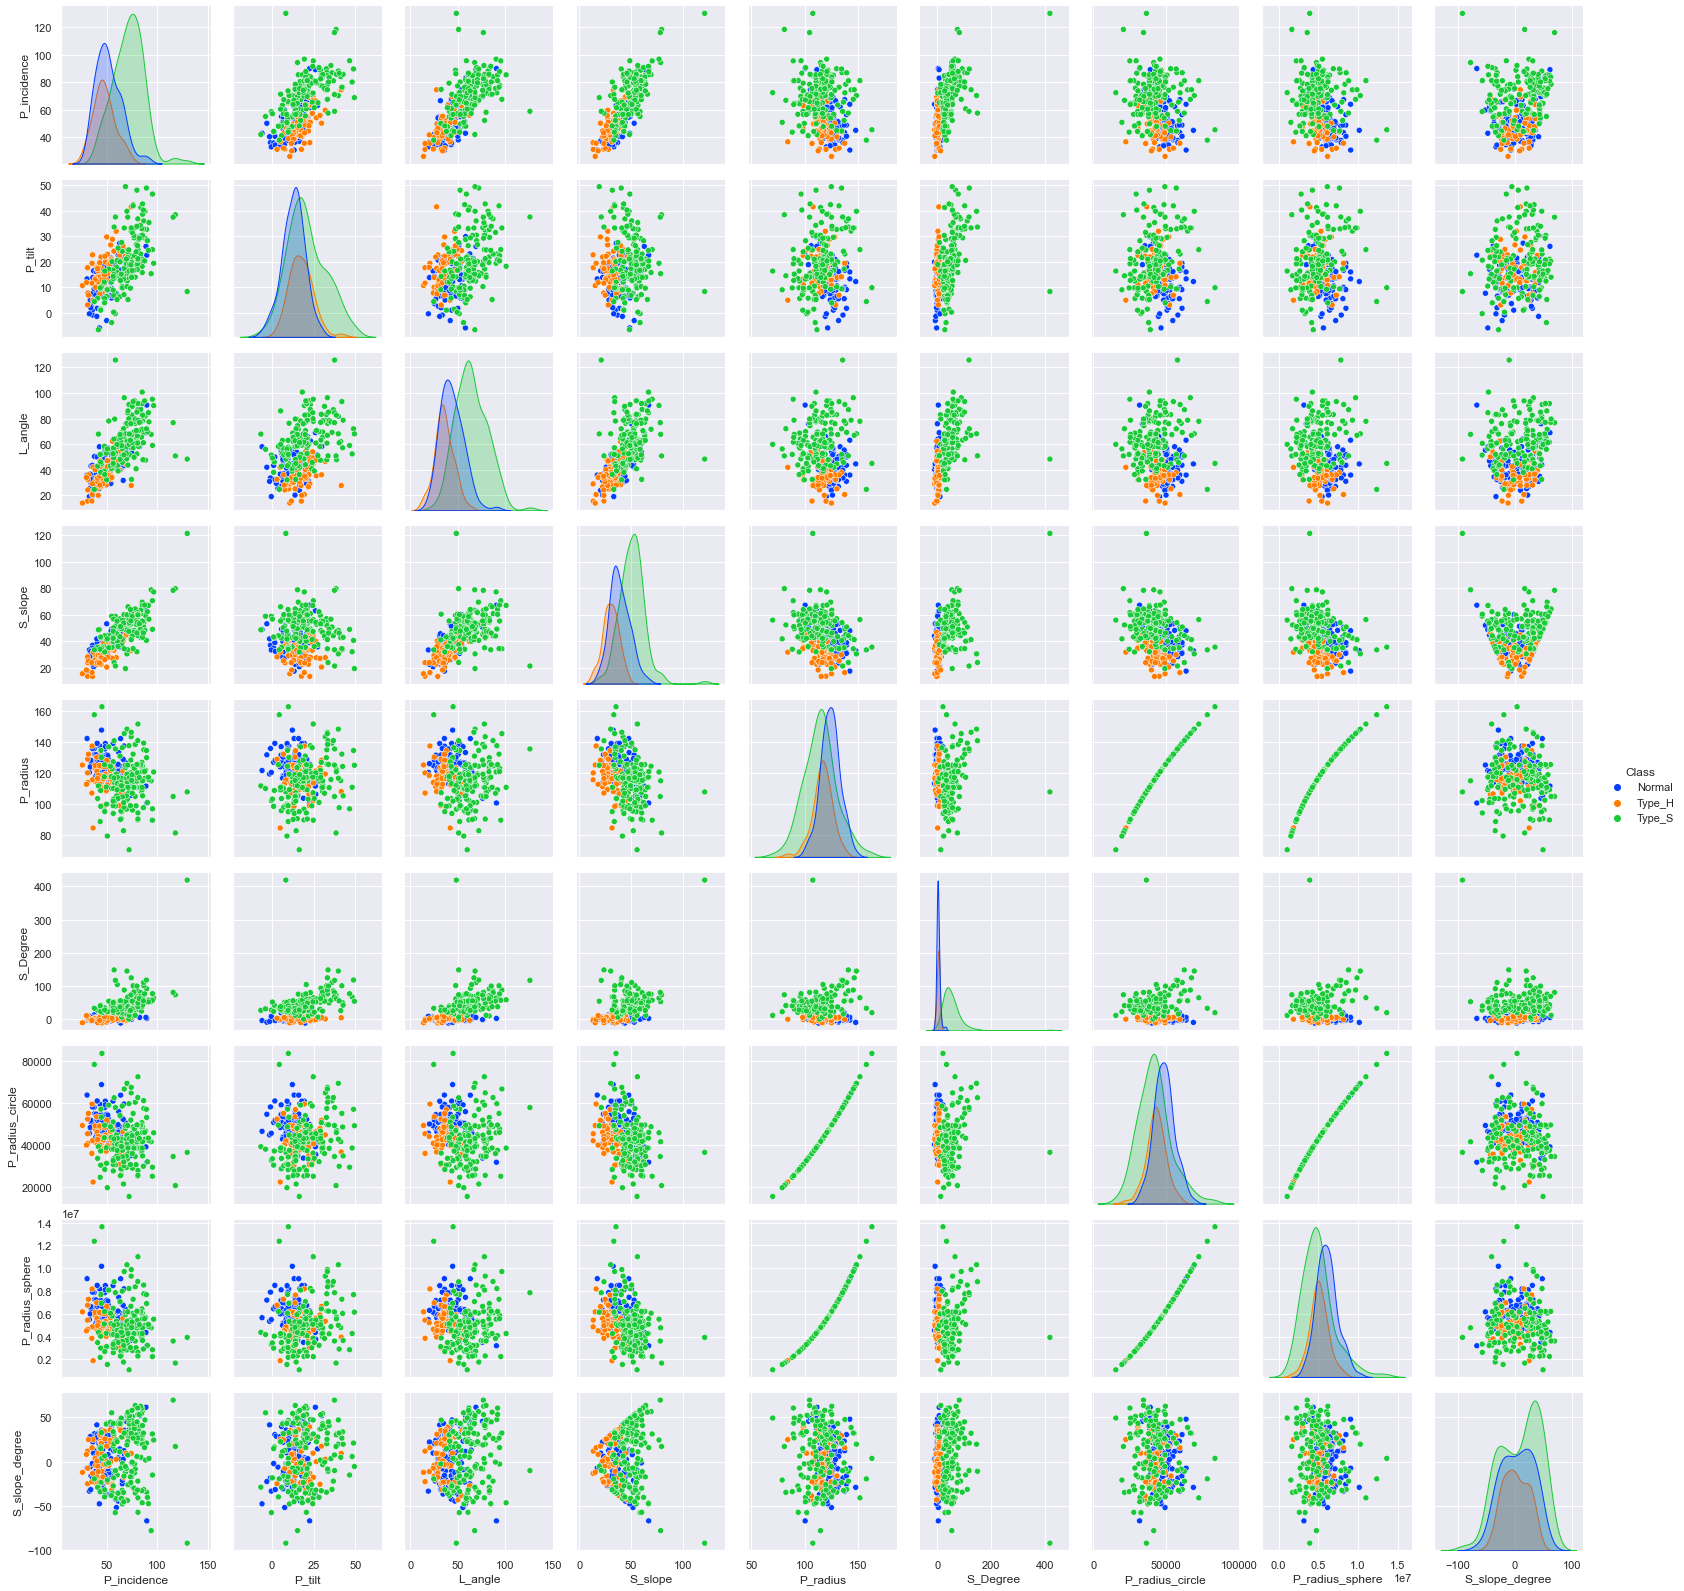

In [69]:
# Displaying a multivariate analysis
sns.pairplot(data=df_master, hue="Class", palette="bright")

###### <font color=#B40404>It looks like Type_S is still distinguishable but Type_H and Normal are pretty overlapped

###### <font color=#B40404>Now let's visualise if we can separate Normal and Abnormal through bivariate analysis.

In [70]:
df_normal = df_master[df_master["Class"]=="Normal"]
df_abnormal = df_master[df_master["Class"]!="Normal"]
print("Normal")
df_normal.info()
print()
print('Abnormal')
df_abnormal.info()

Normal
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   P_incidence      100 non-null    float64
 1   P_tilt           100 non-null    float64
 2   L_angle          100 non-null    float64
 3   S_slope          100 non-null    float64
 4   P_radius         100 non-null    float64
 5   S_Degree         100 non-null    float64
 6   P_radius_circle  100 non-null    float64
 7   P_radius_sphere  100 non-null    float64
 8   S_slope_degree   100 non-null    float64
 9   Class            100 non-null    object 
dtypes: float64(9), object(1)
memory usage: 8.6+ KB

Abnormal
<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 100 to 309
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   P_incidence      210 non-null    float64
 1   P_tilt           210 non-

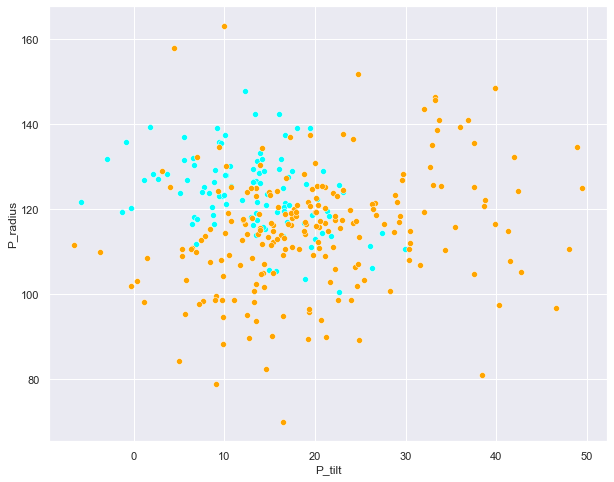

In [71]:
# Displaying P_tilt vs P_radius for distinguishing between normal and others
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_normal, x="P_tilt",y="P_radius", color="cyan")
sns.scatterplot(data=df_abnormal, x="P_tilt",y="P_radius", color="orange")
plt.show()

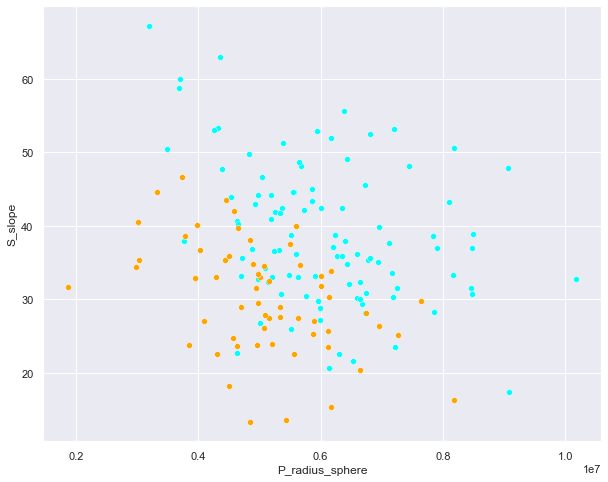

In [72]:
# Creating a scatterplot figure with  P_radius_sphere vs S_slope to distinguish between Normal and Type_H
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_normal, x="P_radius_sphere",y="S_slope", color="cyan")
sns.scatterplot(data=df_abnormal[df_abnormal["Class"] == "Type_H"], x="P_radius_sphere",y="S_slope", color="orange")
plt.show()

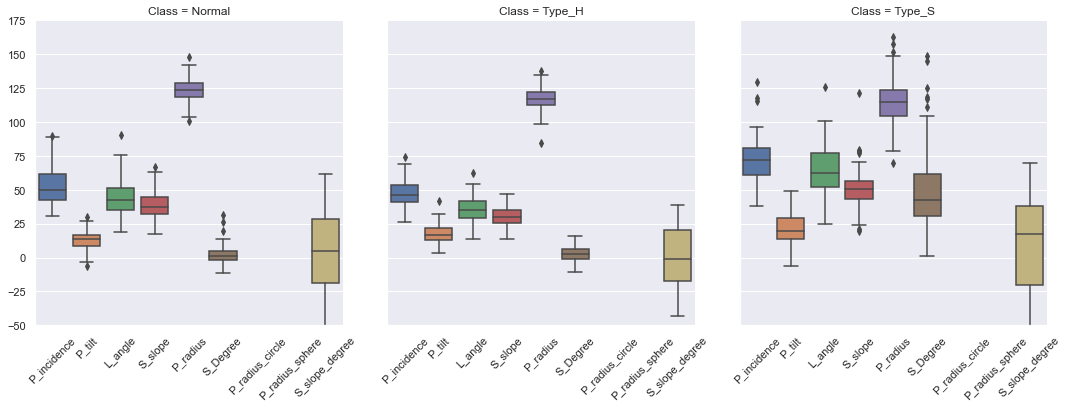

In [73]:
# Displaying boxplots for distinguishing between the classes
g = sns.catplot(data=df_master, col="Class", kind="box")
g.set_xticklabels(rotation=45)
plt.ylim(-50, 175)

plt.show()

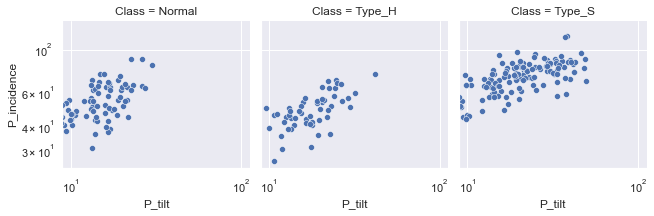

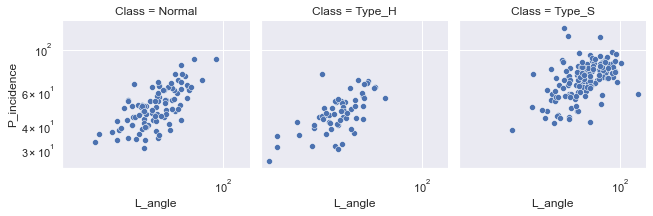

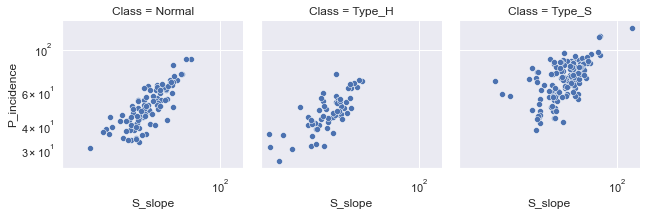

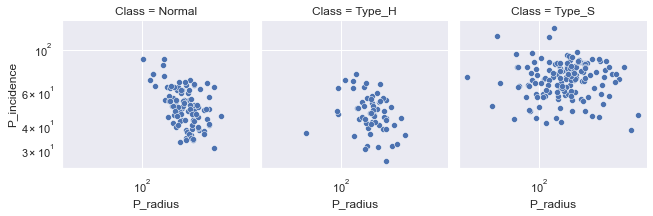

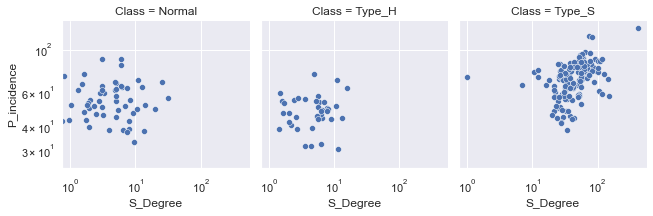

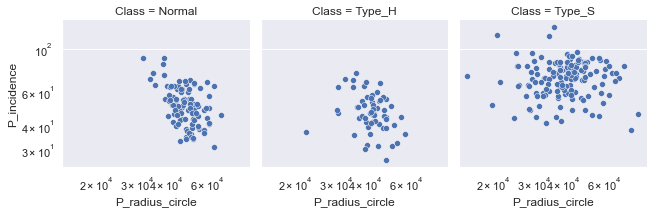

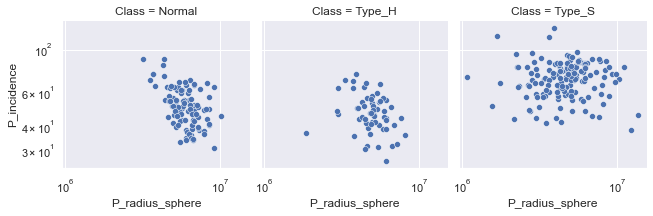

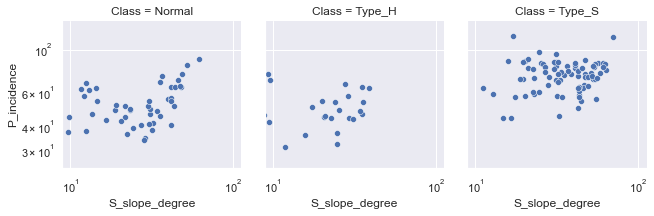

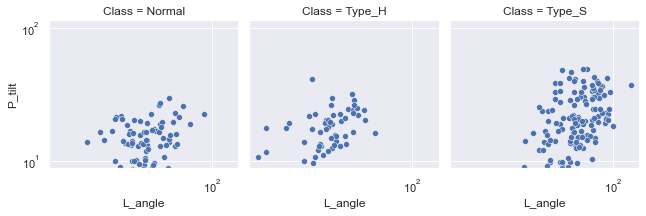

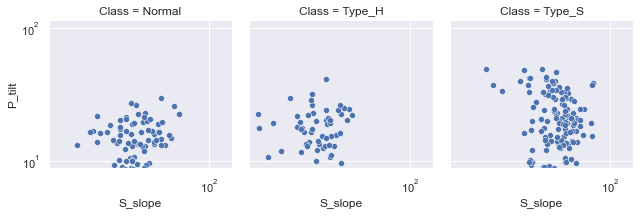

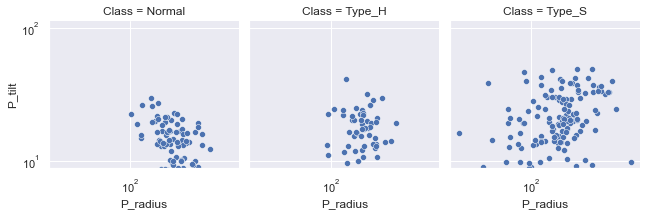

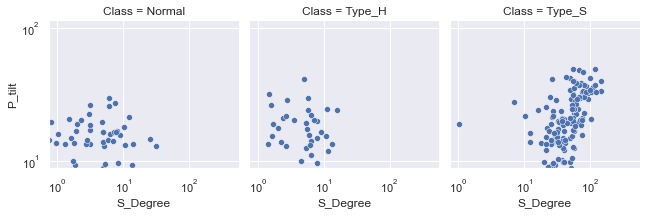

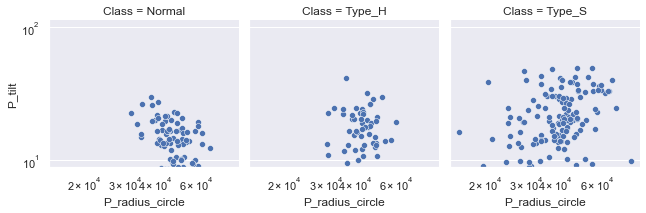

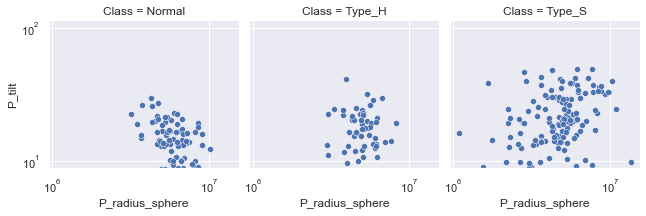

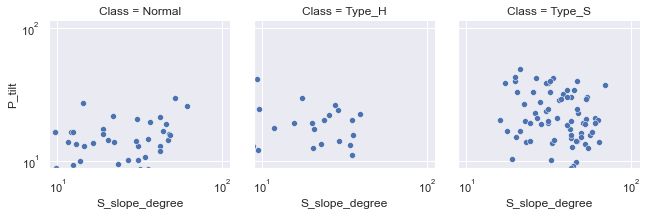

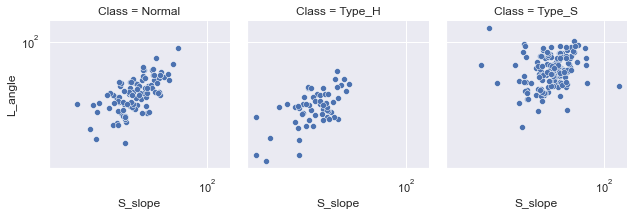

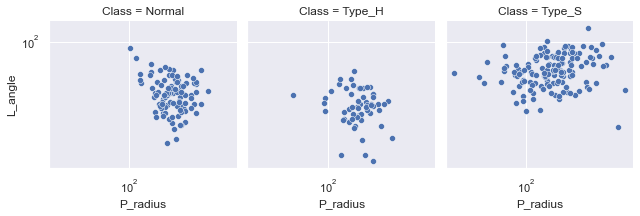

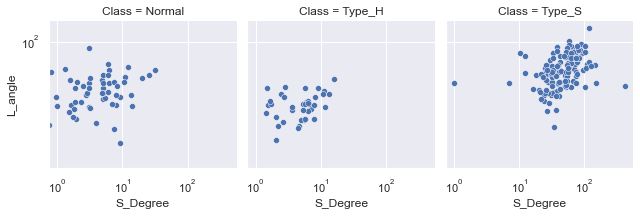

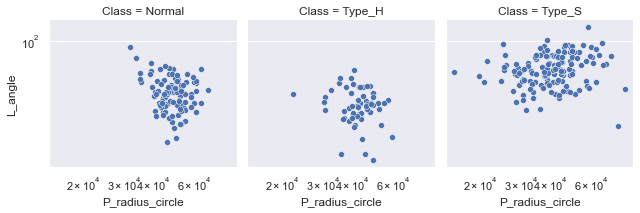

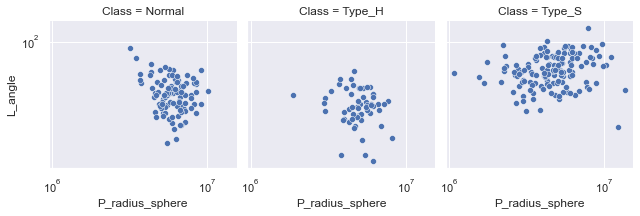

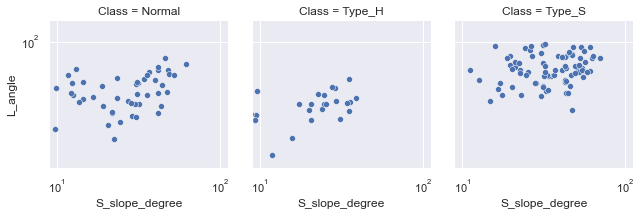

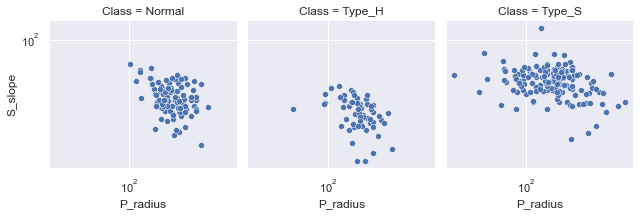

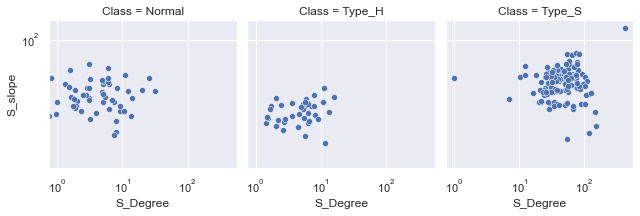

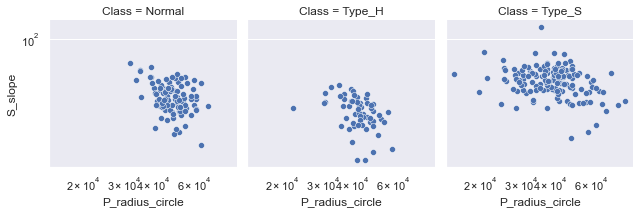

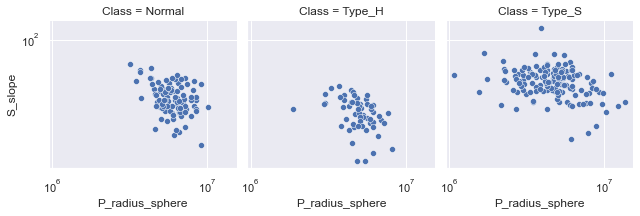

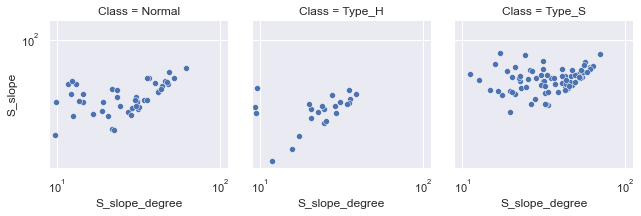

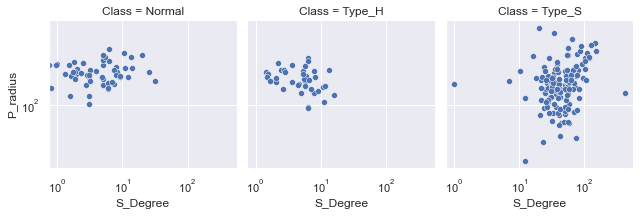

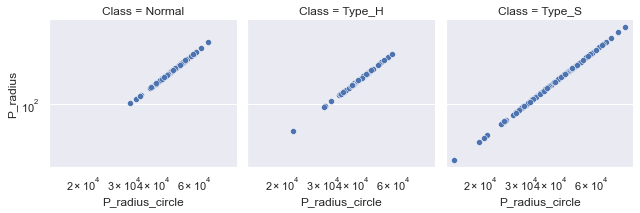

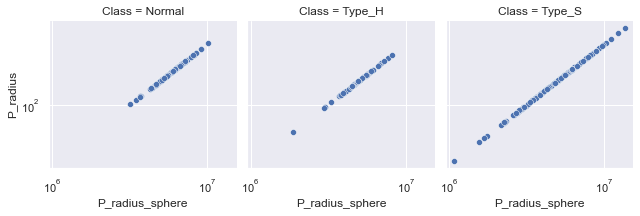

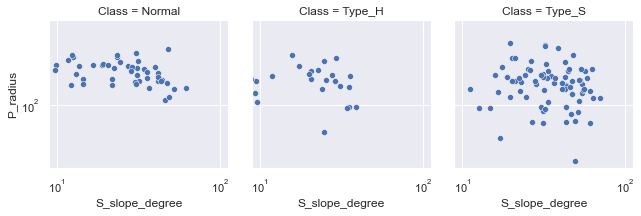

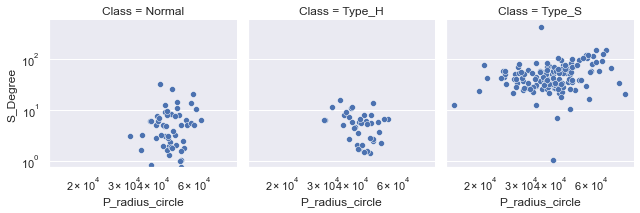

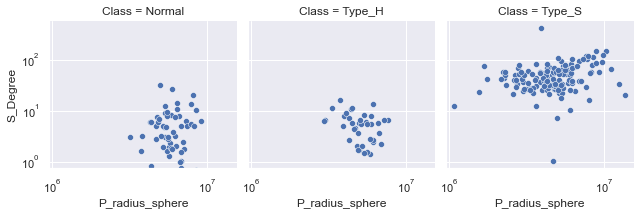

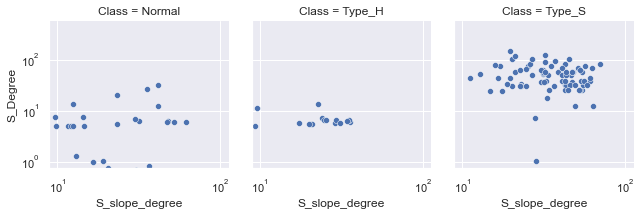

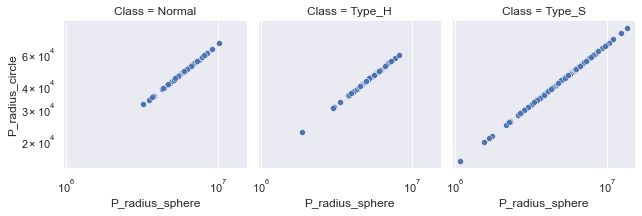

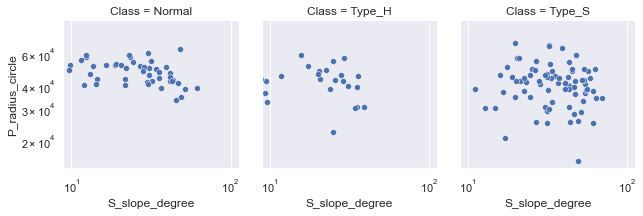

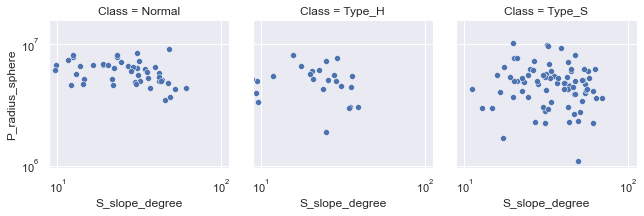

In [74]:
# Displaying the scatterplots for all combination of attributes
for y in range(len(df_master.columns[:-1])):
    for x in range(len(df_master.columns[:-1])):
        if x>y:
            g = sns.FacetGrid(df_master, col="Class")
            g.map(sns.scatterplot, df_master.columns[:-1][x], df_master.columns[:-1][y])
            # Using log scale to exxagarate the differences
            g.set(xscale="log")
            g.set(yscale="log")
            plt.show()

###### <font color=#B40404>We have uncovered a lot of interesting points during the EDA.
###### <font color=#B40404>Assumption 1: Some attributes are more significant in classifying between Normal and Abnormal and Normal, Type_H and Type_S. However, Type_H and Normal are harder to distinctly separate. Although, P_radius_sphere and S_slope are two attributes which can pronounce the difference in Normal and Type_H most. Even though this is the case along with proof that Type_S can also be separated with fewer attributes, we will avoid using such specific feature selection to avoid overfitting. We will wait for more data or evidence before we add weights to different features.

#### 4. Data pre-processing:
##### • Segregate predictors vs target attributes

In [75]:
# Seperating Predictor variables, we know the target variable "Class" is the last column
X = df_master.iloc[:, :-1]

# Seperating Target variables, we know the target variable is called "Class"
y = df_master["Class"]

##### • Perform normalisation or scaling if required.

In [76]:
# Scaling the data so to give equal importance to all attributes
X = (X - np.min(X))/(np.max(X) - np.min(X))
X.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,P_radius_circle,P_radius_sphere,S_slope_degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.331276,0.430419,0.339450,0.273794,0.514452,0.086952,0.422982,0.340071,0.604974
std,0.166237,0.178762,0.166043,0.124216,0.143215,0.087428,0.144095,0.141193,0.190350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195613,0.307608,0.205831,0.184895,0.436900,0.029474,0.338780,0.253669,0.450989
50%,0.313862,0.409251,0.318253,0.268714,0.518189,0.053133,0.418614,0.328152,0.617519
75%,0.450685,0.512180,0.438509,0.363946,0.595613,0.121847,0.499551,0.408526,0.761620
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
# Displaying target values
y

0      Normal
1      Normal
2      Normal
3      Normal
4      Normal
        ...  
305    Type_S
306    Type_S
307    Type_S
308    Type_S
309    Type_S
Name: Class, Length: 310, dtype: object

In [78]:
# Encoding Target variables
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

# Displaying the order of the classes
le.classes_

array(['Normal', 'Type_H', 'Type_S'], dtype=object)

##### • Check for target balancing. Add your comments.

Unique Label Count
(array(['Normal', 'Type_H', 'Type_S'], dtype=object), array([100,  60, 150], dtype=int64))
Proportions
[0.32258065 0.19354839 0.48387097]


<AxesSubplot:xlabel='Class', ylabel='count'>

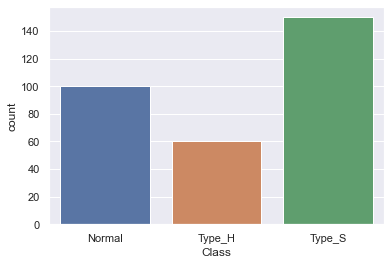

In [79]:
# Getting the count of unique values in target variable
unique = np.unique(df_master["Class"], return_counts=True)

# Printing the Count and proportions
print("Unique Label Count")
print(unique)
print("Proportions")
print(unique[1]/len(df_master))

# Displaying count of target variable
sns.countplot(x=df_master["Class"])

###### <font color=#B40404>We can see that there is a lot of imbalance in the data. About 100 records are Normal, 60 are Type_H and 150 are Type_S. Since Type_H is already at such a low value we will not try to Balance the Data by dropping values. Instead we will deal with the Imbalance through the evaluation metrics for imbalanced data.

##### • Perform train-test split.

In [80]:
# Performing the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [81]:
# Verifying the proportions of y_train and y_test is the same as original dataset
print("y_train proportions")
print(np.unique(y_train, return_counts=True)[1]/len(y_train))

print("y_test proportions")
print(np.unique(y_test, return_counts=True)[1]/len(y_test))

y_train proportions
[0.32258065 0.19354839 0.48387097]
y_test proportions
[0.32258065 0.19354839 0.48387097]


#### 5. Model training, testing and tuning:
##### • Design and train a KNN classifier.

###### <font color=#B40404>First we will choose a generic k value for KNN classification. The generic value will be the square root of the total number of records in training set

In [82]:
# Setting k value to a guestimate.
k = int(np.sqrt(len(X_train)))

# Building the model
classifier = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Building a confusion matrix as a dataframe
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
             index=["T_Normal", "T_Type_H", "T_Type_S"], columns=["P_Normal", "P_Type_H", "P_Type_S"])

##### • Display the classification accuracies for train and test data.

In [83]:
# Displaying the classification accuracy for test data
accuracy = 0

# Adding the diagonals of the confusion matrix
for i in range(df_cm.shape[1]):
    accuracy += df_cm.iloc[i, i]

# Displaying the Accuracy
print("Accuracy: ", accuracy/len(y_pred))

Accuracy:  0.6774193548387096


##### • Display and explain the classification report in detail.

In [84]:
df_cm

,P_Normal,P_Type_H,P_Type_S
T_Normal,12,3,5
T_Type_H,4,7,1
T_Type_S,7,0,23


###### <font color=#B40404>From the above confusion matrix and our understanding of the Healthcare system we can agree that we would want to make sure that when we diagnose someone as Normal then we should be quite confident about our prediction since we do not want to send an ill patient home. Rather we would be corrected during further testing.
    
###### <font color=#B40404>Inference 1: For the above reason we will choose precision of Normal Prediction as the evaluation metric to choose our best model. As secondary data points we will choose Recall of Type_H and Type_S, since we want to also ensure that most of actual Type_H and Type_S is caught by our model

In [85]:
# Displaying the statistics of the classification Report
# Initialising precision and recall variables
prec_avg = 0
rec_avg = 0
for i in range(len(le.classes_)):
    # Calculating Precision and Recall
    prec = df_cm.iloc[i, i]/sum(df_cm.iloc[:, i])
    rec = df_cm.iloc[i, i]/sum(df_cm.iloc[i, :])
    
    #Totalling up precision and recall for each label
    prec_avg += prec
    rec_avg += rec
    print()
    print(le.classes_[i])
    print("Precision: ", prec)
    print("Recall: ", rec)
prec_avg = prec_avg/3
rec_avg = rec_avg/3
f1_avg = 2 * (prec_avg * rec_avg)/(prec_avg+rec_avg)
print("\nF1 Score of the entire model", f1_avg)                


Normal
Precision:  0.5217391304347826
Recall:  0.6

Type_H
Precision:  0.7
Recall:  0.5833333333333334

Type_S
Precision:  0.7931034482758621
Recall:  0.7666666666666667

F1 Score of the entire model 0.6606303529901117


##### • Automate the task of finding best values of K for KNN.

In [86]:
# Splitting X_train and y_train in validation set and the rest as training set
X_all, X_val, y_all, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [87]:
# Function to return precision of Normal label and recall of Type_H and Type_S when actual and predicted values are provided
def score(y_val, y_pred):
    cm = confusion_matrix(y_val, y_pred)
    precnormal = cm[0, 0]/sum(cm[0, :])
    recH = cm[1, 1]/sum(cm[:, 1])
    recS = cm[2, 2]/sum(cm[:, 2])
    return(precnormal, recH, recS)

In [88]:
# Cross validation against validation set to get the optimum k value
# Initialising variables
prec_normal = []
rec_Type_H = []
rec_Type_S = []

# looping through all odd numbers upto 69  as k value (number of Neighbors)
for k in range(1,70,2):
    # Building the model
    classifier = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=2)
    classifier.fit(X_all, y_all)
    
    # Prediction
    y_pred = classifier.predict(X_val)
    
    # Validation of desired metrics against the validation set
    precnormal, recH, recS = score(y_val, y_pred)
    prec_normal.append(precnormal)
    rec_Type_H.append(recH)
    rec_Type_S.append(recS)
    print("For K = %d, precision for Normal is %f" %(k, prec_normal[-1]))

For K = 1, precision for Normal is 0.562500
For K = 3, precision for Normal is 0.687500
For K = 5, precision for Normal is 0.625000
For K = 7, precision for Normal is 0.812500
For K = 9, precision for Normal is 0.687500
For K = 11, precision for Normal is 0.750000
For K = 13, precision for Normal is 0.812500
For K = 15, precision for Normal is 0.812500
For K = 17, precision for Normal is 0.812500
For K = 19, precision for Normal is 0.812500
For K = 21, precision for Normal is 0.812500
For K = 23, precision for Normal is 0.812500
For K = 25, precision for Normal is 0.812500
For K = 27, precision for Normal is 0.750000
For K = 29, precision for Normal is 0.750000
For K = 31, precision for Normal is 0.750000
For K = 33, precision for Normal is 0.750000
For K = 35, precision for Normal is 0.750000
For K = 37, precision for Normal is 0.750000
For K = 39, precision for Normal is 0.750000
For K = 41, precision for Normal is 0.750000
For K = 43, precision for Normal is 0.750000
For K = 45, pre

<ipython-input-87-897a4b7fc5ae>:5: RuntimeWarning: invalid value encountered in longlong_scalars
  recH = cm[1, 1]/sum(cm[:, 1])


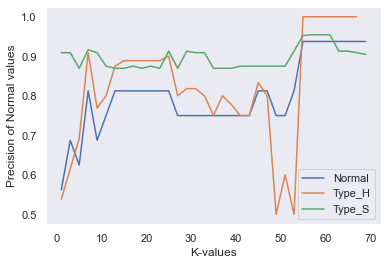

In [89]:
# Displaying the results of Precision of Normal, Recall of Type_H and Recall of Type_S
fig, ax = plt.subplots()
plt.plot(range(1,70,2), prec_normal, label = "Normal")
plt.plot(range(1,70,2), rec_Type_H, label = "Type_H")
plt.plot(range(1,70,2), rec_Type_S, label = "Type_S")
plt.xlabel("K-values")
plt.ylabel("Precision of Normal values")
plt.legend()
plt.grid()
plt.show()

In [90]:
# Displaying the k for the highest precision for normal, 
# k can be calculated back from the index position by multiplying by 2 and adding 1 since we took only odd numbers starting at 1

# Calculating the best index position for high Normal precision and then Secondary highest Recall for Type_H and then Type_S
index = pd.DataFrame([prec_normal, rec_Type_H, rec_Type_S]).T.sort_values([0,1,2], ascending=False).index[0]

print("The highest precision for normal is at %3.2f%% which is at k=%d" 
      %(prec_normal[index]*100, 2*index+1))

The highest precision for normal is at 93.75% which is at k=57


##### • Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model.

###### <font color=#B40404>From Inference 1 we have chosen the best k on precision of Normal. Best number of neighbors (k) has come out as 57 for minkowski metric with p as 2, which is essentially Euclidean distance.
###### <font color=#B40404>From Assumption 1 we have decided that since we have a handful of features hence no feature selection will applied to our final model
    
###### <font color=#B40404>Proceeding to build the final model from X_train, y_train, X_test and y_test previously created

In [91]:
# Building the Final Model
classifier = KNeighborsClassifier(n_neighbors=57, metric="minkowski", p=2)
classifier.fit(X_train, y_train)

# Predicting the results against the test set
y_pred = classifier.predict(X_test)

# Building a confusion matrix for evaluation
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
             index=["T_Normal", "T_Type_H", "T_Type_S"], columns=["P_Normal", "P_Type_H", "P_Type_S"])
                     
# Displaying the classification accuracy for test data
accuracy = 0

for i in range(df_cm.shape[1]):
    accuracy += df_cm.iloc[i, i]
    
print("Accuracy: ", accuracy/len(y_pred))

Accuracy:  0.6612903225806451


In [92]:
# Displaying the confusion matrix
df_cm

,P_Normal,P_Type_H,P_Type_S
T_Normal,15,2,3
T_Type_H,6,5,1
T_Type_S,9,0,21


In [93]:
# Displaying the statistics of the classification Report
# Initialising precision and recall variables
prec_avg = 0
rec_avg = 0
for i in range(len(le.classes_)):
    # Calculating Precision and Recall
    prec = df_cm.iloc[i, i]/sum(df_cm.iloc[:, i])
    rec = df_cm.iloc[i, i]/sum(df_cm.iloc[i, :])
    
    #Totalling up precision and recall for each label
    prec_avg += prec
    rec_avg += rec
    print()
    print(le.classes_[i])
    print("Precision: ", prec)
    print("Recall: ", rec)
prec_avg = prec_avg/3
rec_avg = rec_avg/3
f1_avg = 2 * (prec_avg * rec_avg)/(prec_avg+rec_avg)
print("\nF1 Score of the entire model", f1_avg)            


Normal
Precision:  0.5
Recall:  0.75

Type_H
Precision:  0.7142857142857143
Recall:  0.4166666666666667

Type_S
Precision:  0.84
Recall:  0.7

F1 Score of the entire model 0.6519957898145898


#### 6. Conclusion and improvisation:
##### • Write your conclusion on the results.

###### <font color=#B40404>Conclusion on the results is that are our final model is still incorrectly predicting about 50% of all its Normal predictions. Our Validation done on within the Training set was meant to reduce this particular value but when testing on the isolated test set this precision is falling.
###### <font color=#B40404>However our final model's F1 score is improving and so is accuracy. We have also done a really good job on predicting Type_S, however distinguishing Type_H and Normal still remains troublesome. Maybe Type_H and Normal can be separately classified in a binary setting and also more complex models can be used to tackle them.
###### <font color=#B40404>Another surprise was that our initial guess of k as the square root of the number of records has outperformed our final model. Although this looks bad we believe that coincidentally our guesstimate fit our test set better. However, we are confident that the cross validation we performed will prove itself on unknown data. Hence our final model will do well on unknown data as well.

##### • Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the research team to perform a better data analysis in future

###### <font color=#B40404>As always more data would have been useful since Type_H and Normal were not clearly distinguishable. More data in the form of more features is advisable. More information on the labels would have been great as well. Feature names like Degree and slope sound like some form of trigonometric values. But on verification we were hoping the value would confine itself to 360 degrees. Although high degrees are not impossible but then it casts doubts whether these are angles or not. Names like radius also raise similar questions hence more information on the features would allow us to create more features.